In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the MoveNet Thunder model
model = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")

In [2]:
# ✅ Define COCO keypoints indices for MoveNet
MOVENET_KEYPOINTS = {
    "LEFT_SHOULDER": 5,
    "LEFT_ELBOW": 7,
    "LEFT_WRIST": 9,
    "LEFT_HIP": 11,
    "LEFT_KNEE": 13,
    "LEFT_ANKLE": 15,
}


In [4]:
def load_image(image_path):
    """Loads an image, resizes it, and converts it to a tensor."""
    image = cv2.imread(image_path)  # Read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image_resized = cv2.resize(image, (256, 256))  # Resize for model
    image_tensor = tf.convert_to_tensor(image_resized, dtype=tf.int32)
    image_tensor = tf.expand_dims(image_tensor, axis=0)  # Add batch dimension
    return image, image_tensor

# ✅ Provide your image path
image_path = r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset\22.png"  # Replace with your image
image, image_tensor = load_image(image_path)


In [5]:
def get_keypoints(image_tensor):
    """Runs MoveNet on the image tensor and returns keypoints."""
    outputs = model.signatures["serving_default"](image_tensor)
    keypoints = outputs['output_0'].numpy()
    return keypoints

# ✅ Get keypoints
keypoints = get_keypoints(image_tensor)


In [6]:
def extract_keypoints(keypoints, image_shape):
    """Extracts selected keypoints, normalizes them, and returns them."""
    height, width, _ = image_shape
    keypoints = keypoints[0][0]  # Extract keypoints

    selected_keypoints = {}
    for name, index in MOVENET_KEYPOINTS.items():
        y, x, confidence = keypoints[index]  # MoveNet format (y, x, confidence)
        x_norm, y_norm = x, y  # Already normalized (0-1 range)

        selected_keypoints[name] = (x_norm, y_norm, confidence)

    return selected_keypoints

# ✅ Extract and normalize keypoints
selected_keypoints = extract_keypoints(keypoints, image.shape)


In [7]:
def draw_keypoints(image, keypoints):
    """Draws keypoints on the original image."""
    height, width, _ = image.shape

    for name, (x_norm, y_norm, confidence) in keypoints.items():  # Only draw high-confidence keypoints
            x, y = int(x_norm * width), int(y_norm * height)  # Scale back
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)
            cv2.putText(image, name, (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    return image

# ✅ Draw keypoints
output_image = draw_keypoints(image.copy(), selected_keypoints)


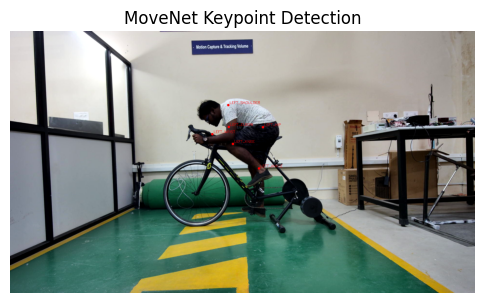

In [8]:

# ✅ Display the image with keypoints
plt.figure(figsize=(6, 6))
plt.imshow(output_image)
plt.axis("off")
plt.title("MoveNet Keypoint Detection")
plt.show()



In [9]:
# ✅ Print the normalized keypoints
if selected_keypoints:
    print("\nNormalized Keypoints (0-1 range) with Confidence Scores:")
    for name, (x_norm, y_norm, conf) in selected_keypoints.items():
        print(f"{name}: (x={x_norm:.5f}, y={y_norm:.5f}, confidence={conf:.2f})")
else:
    print("⚠️ No keypoints to display.")



Normalized Keypoints (0-1 range) with Confidence Scores:
LEFT_SHOULDER: (x=0.46928, y=0.28255, confidence=0.52)
LEFT_ELBOW: (x=0.47042, y=0.36625, confidence=0.30)
LEFT_WRIST: (x=0.43500, y=0.39367, confidence=0.23)
LEFT_HIP: (x=0.54424, y=0.36732, confidence=0.43)
LEFT_KNEE: (x=0.47926, y=0.43081, confidence=0.27)
LEFT_ANKLE: (x=0.53555, y=0.52463, confidence=0.38)
